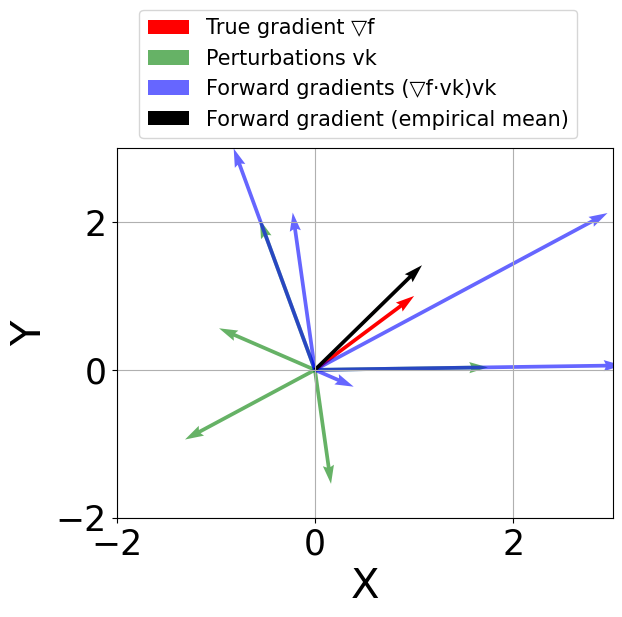

In [34]:
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(42)

# 生成示例数据
A = torch.tensor([1, 1])  # 2维向量A
# B = torch.randn(5, 2)  # 由10个2维向量组成的矩阵B
B = torch.tensor([[ -0.9667, 0.5627],
        [ 0.1622, -1.5422],
        # [ 1.4436, -0.1894],
        [-1.3098, -0.9422],
        [1.7434, 0.0341],
        # [ 0.6153,  0.4494],
        # [ 0.7127,  1.4480],
        [-0.5552,  2.0305]])
# t = torch.randn(5, 2)
# B = torch.concat([B,t])

# 计算矩阵C
C = B*((B * A.unsqueeze(0)).sum(dim=1)).unsqueeze(1)
# 计算向量D
D = torch.mean(C, dim=0)

# 绘制向量A
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='True gradient ▽f')

# 绘制矩阵B中的每个向量
for i,b in enumerate(B):
    label = 'Perturbations vk' if i == 0 else '_nolegend_'
    plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.6, label=label,linewidth=10)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C):
    label = 'Forward gradients (▽f·vk)vk' if i == 0 else '_nolegend_'
    plt.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.6, label=label)
# 绘制向量D
plt.quiver(0, 0, D[0], D[1], angles='xy', scale_units='xy', scale=1, color='black', label='Forward gradient (empirical mean)')

plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y',fontsize=30)
plt.xticks(range(-2,4,2),fontsize=25)
plt.yticks(range(-2,4,2),fontsize=25)
# plt.title('figure 3a')
plt.legend(loc=4,fontsize=15,bbox_to_anchor=(0.95,1))
plt.grid(True)
# plt.show()
plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-forward-gradient-3d_wyz.jpg")

     

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch

plt.figure(dpi=500)

# 定义函数z和其梯度
def z_func(x, y):
    return 2*x**2 + 2*y**2

def gradient_x(x, y):
    return 4 * x

def gradient_y(x, y):
    return 4 * y

# 生成x和y的坐标
x = np.linspace(-3, 3, 30)
y = np.linspace(-0.25, 3, 10)
X, Y = np.meshgrid(x, y)

# 计算z的值
Z = z_func(X, Y)

# 绘制等高线图
plt.contour(X, Y, Z, levels=20, cmap='viridis')

B1 = torch.tensor([[0.2,0.98],[-0.3,0.95]])
B1 = B1/B1.norm(dim=-1)
A1 = torch.tensor([0,2])

C1 = B1*((B1 * A1).sum(dim=-1)).unsqueeze(1)
D1 = torch.mean(C1, dim=0)
print(D1)

# for i,b in enumerate(B1):
#     label = 'High similarity Perturbations' if i == 0 else '_nolegend_'
#     plt.quiver(0, 0.5, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.4, label=label)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C1):
    label = 'High Useful Forward gradients' if i == 0 else '_nolegend_'
    plt.quiver(0, 0.5, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='darkblue', alpha=0.6, label=label)
# 绘制向量D
plt.quiver(0, 0.5, D1[0], D1[1], angles='xy', scale_units='xy', scale=1, color='black', label='Mean Forward gradient (High Useful)')


B2 = torch.tensor([[0.98,0.2],[-0.95,0.3]])
B2 = B2/B2.norm(dim=-1)
A2 = torch.tensor([0,2])

C2 = B2*((B2 * A2).sum(dim=-1)).unsqueeze(1)
D2 = torch.mean(C2, dim=0)
print(D2)

# for i,b in enumerate(B2):
#     label = 'Low similarity Perturbations' if i == 0 else '_nolegend_'
#     plt.quiver(0, 0.5, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='darkblue', alpha=0.4, label=label)

# 绘制矩阵C中的每个向量
for i,c in enumerate(C2):
    label = 'Low Useful Forward gradients' if i == 0 else '_nolegend_'
    plt.quiver(0, 0.5, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.6, label=label)
# 绘制向量D
plt.quiver(0, 0.5, D2[0], D2[1], angles='xy', scale_units='xy', scale=0.5, color='tan', label='Mean Forward gradient (Low Useful)')



# 在点(1, 1)处标注梯度
gradient_at_point = (gradient_x(0, 0.5), gradient_y(0, 0.5))
plt.arrow(0, 0.5, gradient_at_point[0], gradient_at_point[1],linewidth = 2, head_width=0.1, head_length=0.1, fc='r', ec='r', label='Gradient at (0,0.5)')
plt.scatter(0,0,marker='*', color='black', s=100)
plt.scatter(0,0.5,marker='o', color='black', s=50)

# 添加标签和标题
plt.xlabel('X',fontsize=30)
plt.ylabel('Y',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(range(0,5,1),fontsize=25)
plt.xticks(range(-2,4,1),fontsize=25)
# plt.title('Contour Plot of z = x^2 + y^2    Here, the Mean Forward gradient (Low Useful) is enlarged by a factor of five, otherwise it is completely invisible',fontsize=5)

# 显示图形
plt.legend(fontsize=15,loc=3,frameon=False,bbox_to_anchor=(0.050,0.55))
# plt.ylim(-0.5,4)
plt.axis('equal')  # 设置坐标轴刻度相等，保证等高线图是圆的
ax = plt.gca()
ax.set_ylim(-0.05,5)
# plt.show()
plt.savefig("/data/wyz/ForwardFL-Latex/figs/design-sampling-example.pdf",bbox_inches="tight")


tensor([-0.0893,  1.8770])
tensor([-0.0893,  0.1310])
